In [1]:
# %%
import sys
sys.path.append('../')

from configs.config import *
from utils.losses import * 
from utils.plot import * 
from utils.model import * 
from utils.utils import * 
from utils.env import * 
from utils.reward import * 

import numpy as np 
from torch import nn 
import torch
from torch.distributions.categorical import Categorical

from matplotlib import pyplot as plt 
from tqdm import tqdm, trange


In [2]:
# Instantiate model and optimizer
model = TBModel(10)
A_reward = SimpleReward()
env = Env(reward=A_reward)
gfn = TB_GFN(model, env)
opt = torch.optim.Adam(model.parameters(),  1e-3)

In [3]:
gfn.train(opt, N_EPISODES)

Training iter:   0%|          | 0/50000 [00:00<?, ?it/s]

Training iter (loss=318.077545): 100%|██████████| 50000/50000 [02:58<00:00, 280.87it/s] 


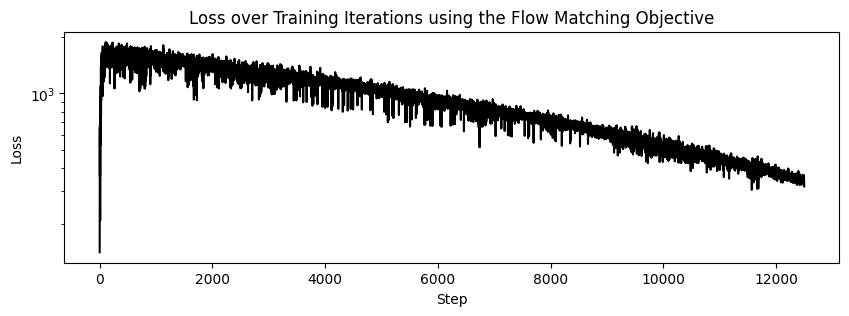

In [4]:
plot_loss_curve(gfn.losses, title="Loss over Training Iterations using the Flow Matching Objective")

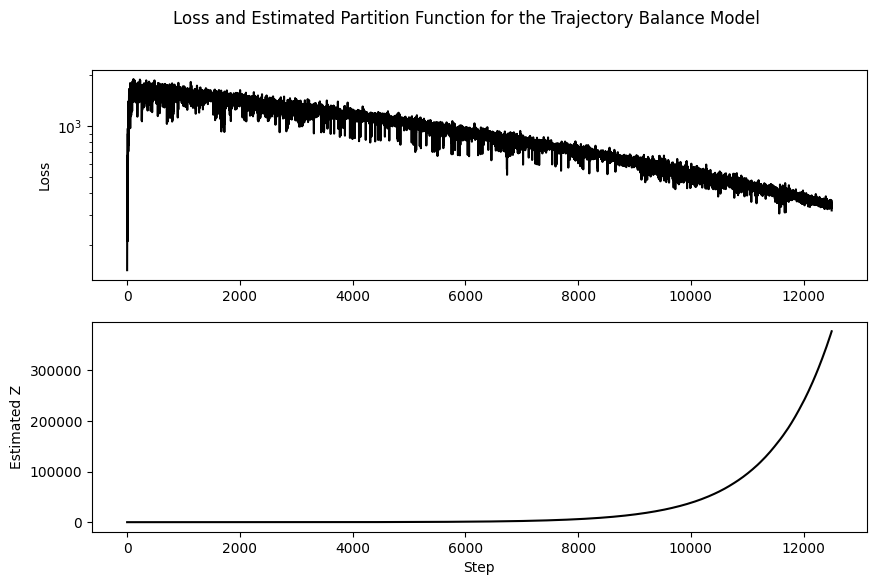

In [5]:
plot_loss_logZ_curves(gfn.losses, gfn.logZs)

In [6]:
print("The final Z (partition function) estimate is {:.2f}".format(model.logZ.exp().item()))

The final Z (partition function) estimate is 377742.31


In [10]:
# Check samples
sampled_seqs = gfn.sample(10)
for sample in sampled_seqs:
    print(f"{sample}: {sample.count(CHAR_TO_IDX['A'])} A's")


[3, 0, 1, 0, 3, 0, 0, 1, 3, 3, 1, 0, 2, 0, 2]: 6 A's
[0, 3, 1, 3, 0, 1, 3, 1, 3, 0, 1, 1, 0, 2, 3]: 4 A's
[2, 3, 2, 0, 1, 0, 0, 3, 2, 3, 0, 2, 2, 0, 0]: 6 A's
[0, 1, 3, 2, 1, 0, 1, 3, 2, 0, 1, 3, 0, 0, 2]: 5 A's
[1, 0, 3, 3, 0, 1, 3, 2, 1, 1, 0, 3, 2, 3, 0]: 4 A's
[1, 2, 0, 3, 2, 0, 3, 1, 1, 2, 2, 0, 3, 0, 0]: 5 A's
[3, 3, 2, 0, 3, 2, 0, 3, 0, 0, 1, 2, 3, 1, 2]: 4 A's
[2, 1, 2, 0, 1, 2, 0, 2, 3, 1, 2, 2, 0, 0, 0]: 5 A's
[0, 1, 0, 3, 2, 2, 1, 3, 2, 2, 2, 1, 0, 3, 3]: 3 A's
[0, 1, 0, 3, 3, 3, 3, 1, 1, 1, 3, 1, 0, 1, 0]: 4 A's


In [17]:
# Check mean of each character among runs
sampled_seqs = gfn.sample(1000)
for letter in VOCAB:
    print(f"{letter}: {(np.array(sampled_seqs) == CHAR_TO_IDX[letter]).sum(axis=1).mean()} per seq in average")

A: 4.345 per seq in average
C: 3.545 per seq in average
G: 3.356 per seq in average
T: 3.754 per seq in average
#: 0.0 per seq in average


Try with new reward

In [9]:
class NewReward(Reward):
    """Simple Reward class that counts number of A in sequence"""
    def __init__(self, name='simple_reward') -> None:
        super().__init__(name)
        
    def get_reward(self, state: list[str]) -> Float:
        # 2*occurrences of 'A' + 1* occurence of 'C' in state
        return float(state.count(CHAR_TO_IDX['C']) + 2*state.count(CHAR_TO_IDX['A']))

In [10]:
# Instantiate model and optimizer
model = TBModel(10)
new_reward = NewReward()
env = Env(reward=new_reward)
gfn = TB_GFN(model, env)
opt = torch.optim.Adam(model.parameters(),  1e-3)

In [11]:
gfn.train(opt, N_EPISODES)

Training iter (loss=85.050819): 100%|██████████| 10000/10000 [00:13<00:00, 723.00it/s]
